In [ ]:
!unzip dataset.zip

Archive:  dataset.zip
replace __MACOSX/._dataset? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._dataset      
  inflating: dataset/.DS_Store       
  inflating: __MACOSX/dataset/._.DS_Store  
  inflating: __MACOSX/dataset/._normal  
  inflating: __MACOSX/dataset/._covid  
  inflating: dataset/normal/NORMAL2-IM-0315-0001.jpeg  
  inflating: __MACOSX/dataset/normal/._NORMAL2-IM-0315-0001.jpeg  
  inflating: dataset/normal/person378_virus_761.jpeg  
  inflating: __MACOSX/dataset/normal/._person378_virus_761.jpeg  
  inflating: dataset/normal/person438_bacteria_1893.jpeg  
  inflating: __MACOSX/dataset/normal/._person438_bacteria_1893.jpeg  
  inflating: dataset/normal/person259_bacteria_1220.jpeg  
  inflating: __MACOSX/dataset/normal/._person259_bacteria_1220.jpeg  
  inflating: dataset/normal/person525_bacteria_2216.jpeg  
  inflating: __MACOSX/dataset/normal/._person525_bacteria_2216.jpeg  
  inflating: dataset/normal/person1935_bacteria_4849.jpeg  
  inflating: __MAC

In [ ]:
import os

dataset_dir=os.path.join('/content/dataset/')
data_covid_dir = os.path.join('/content/dataset/covid')
data_normal_dir=os.path.join('/content/dataset/normal')

In [ ]:
from imutils import paths
import cv2
import os
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer

os.listdir(data_covid_dir)
!ls

dataset  dataset.zip  __MACOSX	sample_data


In [ ]:
imagePaths = list(paths.list_images('/content/dataset'))
data = []
labels = []

In [ ]:
imagePaths

['/content/dataset/normal/person1558_bacteria_4066.jpeg',
 '/content/dataset/normal/person1599_virus_2776.jpeg',
 '/content/dataset/normal/IM-0466-0001.jpeg',
 '/content/dataset/normal/person339_bacteria_1574.jpeg',
 '/content/dataset/normal/person1102_bacteria_3043.jpeg',
 '/content/dataset/normal/person934_virus_1595.jpeg',
 '/content/dataset/normal/person378_virus_761.jpeg',
 '/content/dataset/normal/person438_bacteria_1893.jpeg',
 '/content/dataset/normal/IM-0033-0001-0001.jpeg',
 '/content/dataset/normal/person1935_bacteria_4849.jpeg',
 '/content/dataset/normal/person612_bacteria_2478.jpeg',
 '/content/dataset/normal/NORMAL2-IM-0869-0001.jpeg',
 '/content/dataset/normal/NORMAL2-IM-0696-0001.jpeg',
 '/content/dataset/normal/NORMAL2-IM-1179-0001.jpeg',
 '/content/dataset/normal/IM-0240-0001.jpeg',
 '/content/dataset/normal/person1830_bacteria_4693.jpeg',
 '/content/dataset/normal/person259_bacteria_1220.jpeg',
 '/content/dataset/normal/person989_virus_1667.jpeg',
 '/content/dataset/

In [ ]:
for imagePath in imagePaths:
	# extract the class label from the filename
	label = imagePath.split(os.path.sep)[-2]

	# load the image, swap color channels, and resize it to be a fixed
	# 224x224 pixels while ignoring aspect ratio
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))

	# update the data and labels lists, respectively
	data.append(image)
	if label=="normal":
		labels.append(0)
	else:
		labels.append(1)
	
	
	
	

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(data[0])

TypeError: ignored

In [ ]:

from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer


In [ ]:
print(len(labels))
print(len(data))


50
50


In [ ]:
import numpy as np
data = np.array(data) / 255.0
labels = np.array(labels)

In [ ]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=None)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

In [ ]:
from tensorflow.keras.applications import VGG16
baseModel = VGG16(weights="imagenet", include_top=False,input_shape=(224, 224, 3))

In [ ]:
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(2, 2))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(128, activation="relu")(headModel)
headModel = Dropout(0.4)(headModel)
headModel = Dense(1, activation="sigmoid")(headModel)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import RMSprop
INIT_LR = 1e-3
EPOCHS = 30
BS = 8


model = Model(inputs=baseModel.input, outputs=headModel)

# loop over all layers in the base model and freeze them so they will
# *not* be updated during the first training process
for layer in baseModel.layers:
	layer.trainable = False

# compile our model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy",optimizer=opt,
	metrics=["accuracy"])

# train the head of the network
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)



[INFO] compiling model...
[INFO] training head...
Epoch 1/30
5/5 [==============================] - 2s 465ms/step - loss: 0.6584 - acc: 0.5000 - val_loss: 0.4895 - val_acc: 0.6000
Epoch 2/30
5/5 [==============================] - 0s 43ms/step - loss: 0.5254 - acc: 0.7000 - val_loss: 0.4157 - val_acc: 0.7000
Epoch 3/30
5/5 [==============================] - 0s 89ms/step - loss: 0.3999 - acc: 0.8000 - val_loss: 0.3572 - val_acc: 0.8000
Epoch 4/30
5/5 [==============================] - 0s 98ms/step - loss: 0.2453 - acc: 0.9500 - val_loss: 0.2947 - val_acc: 0.7000
Epoch 5/30
5/5 [==============================] - 1s 101ms/step - loss: 0.1938 - acc: 0.9250 - val_loss: 0.2403 - val_acc: 0.8000
Epoch 6/30
5/5 [==============================] - 1s 103ms/step - loss: 0.1679 - acc: 0.9500 - val_loss: 0.2320 - val_acc: 0.9000
Epoch 7/30
5/5 [==============================] - 0s 98ms/step - loss: 0.0827 - acc: 1.0000 - val_loss: 0.2005 - val_acc: 0.9000
Epoch 8/30
5/5 [============================

In [ ]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

print(predIdxs)
Pred=[]

for i in predIdxs:
  if i>0.5:
    Pred.append(1)
  else:
    Pred.append(0)
Pred=np.array(Pred)
print(Pred)
print(testY)
print(classification_report(testY, Pred))

[INFO] evaluating network...
[[0.8126473 ]
 [0.9641865 ]
 [0.00288582]
 [0.608194  ]
 [0.9774253 ]
 [0.9642147 ]
 [0.98123395]
 [0.00870535]
 [0.00330814]
 [0.00149734]]
[1 1 0 1 1 1 1 0 0 0]
[1 1 0 0 1 1 1 0 0 0]
              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



In [ ]:
cm = confusion_matrix(testY, Pred)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

# show the confusion matrix, accuracy, sensitivity, and specificity
print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[4 1]
 [0 5]]
acc: 0.9000
sensitivity: 0.8000
specificity: 1.0000


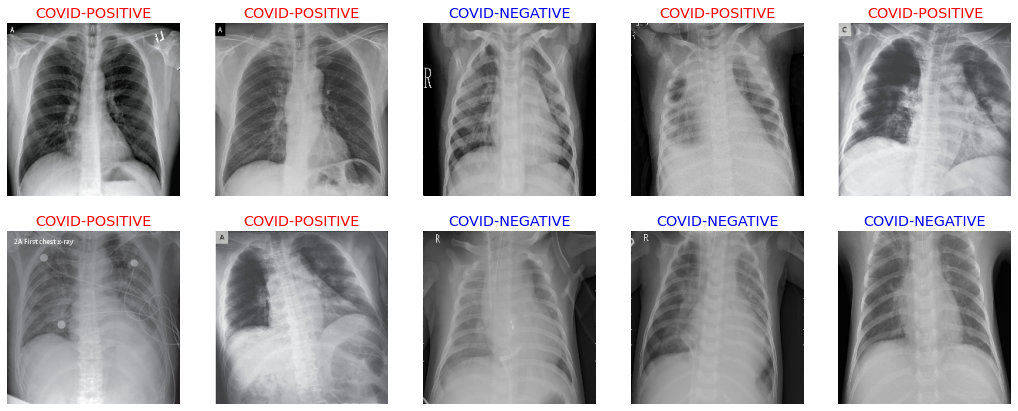

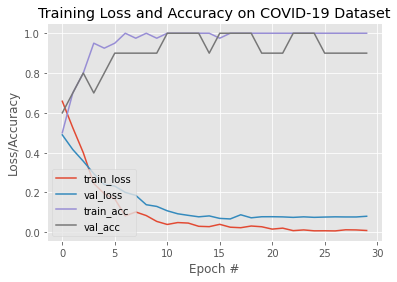

In [ ]:
import matplotlib.pyplot as plt
fig = plt.gcf()
fig.set_size_inches(3 * 6, 7)
for i in range(10):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(2,5, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  if Pred[i]==1:
    plt.title('COVID-POSITIVE',color='red')
  else:
    plt.title("COVID-NEGATIVE",color='blue')
  plt.imshow(testX[i])
  
plt.show()

N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")